In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as sci
import scipy.constants as constants

In [3]:
h = constants.h
c = constants.c
e = constants.e
k = constants.k

In [4]:
def Energy(wl):
    return h*c/(wl*1e-9*e)

def wl(E):
    return h*c/(E*e*1e-9)

In [7]:
R = pd.read_csv("DB918_Tungsten_4", header=2, sep='\t')
PL = pd.read_csv("T=13-Copy1.0", header=2, sep='\t')
Bulk = pd.read_csv("run1-Copy1", header=2, sep='\t')

In [8]:
R.rename(columns={'Lambda (nm)': 'Wavelength', "Energies (eV)" : "Energy", 'Voltages (V)': 'Voltage'}, inplace=True)
Bulk.rename(columns={'Lambda (nm)': 'Wavelength', "Energies (eV)" : "Energy", 'Voltages (V)': 'Voltage'}, inplace=True)
PL.rename(columns={'Lambda (nm)': 'Wavelength', "Energies (eV)" : "Energy", 'Voltages (V)': 'Voltage'}, inplace=True)

In [9]:
def norm(data):
    return [point/max(abs(data)) for point in data]

In [10]:
b, a = sci.butter(2, 0.08, 'lp')

In [11]:
diff_y = np.diff(sci.filtfilt(b, a, norm(R['Voltage']))) / np.diff(R['Wavelength'])

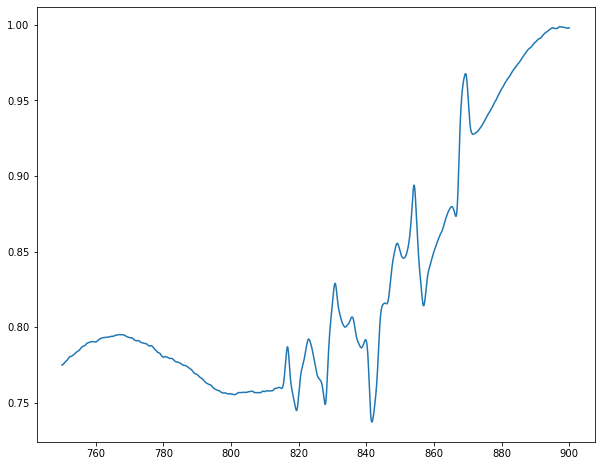

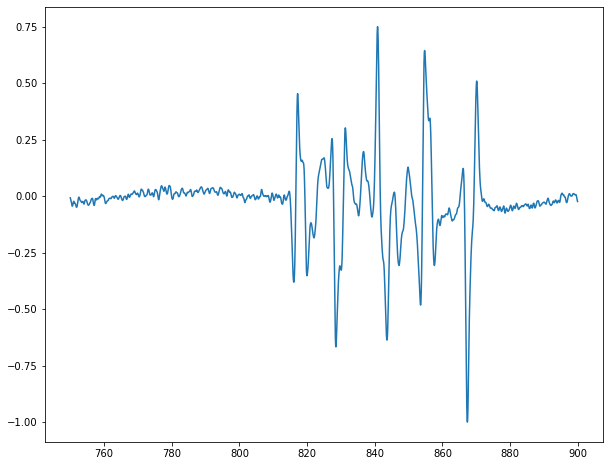

In [12]:
plt.figure(figsize=(10,8))
plt.plot(R['Wavelength'], sci.filtfilt(b, a, norm(R['Voltage'])))
plt.figure(figsize=(10,8))
plt.plot(R['Wavelength'][:-1],norm(-diff_y))

In [14]:
peak_indices = sci.find_peaks(norm(diff_y),prominence=0.2, distance=25)[0]
peak_indices_neg = sci.find_peaks(norm(-diff_y),prominence=0.2, distance=25)[0]

In [15]:
peak_wl = [R['Wavelength'][i] for i in peak_indices]
peak_height = sci.peak_prominences(norm(diff_y), peak_indices)[0]
peak_wl_neg = [R['Wavelength'][i] for i in peak_indices_neg]
peak_height_neg = sci.peak_prominences(norm(-diff_y), peak_indices_neg)[0]

In [16]:
peak_indices_all = [*peak_indices,*peak_indices_neg]
peak_wl_all = [*peak_wl,*peak_wl_neg]

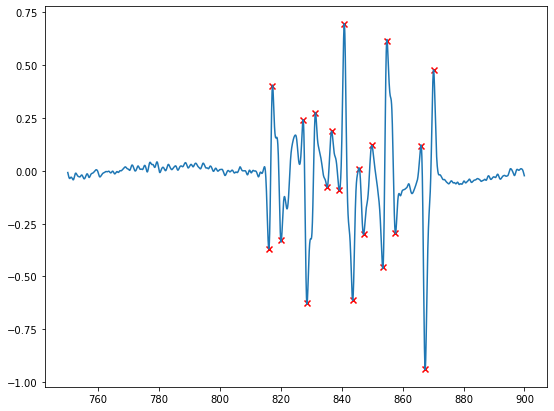

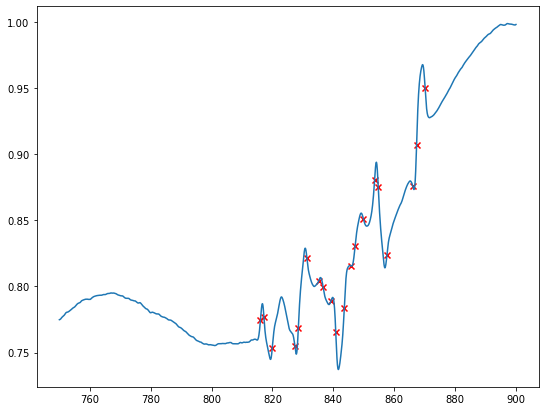

In [17]:
plt.figure(figsize=(9,7))
plt.scatter(peak_wl_all,[sci.filtfilt(b, a, norm(-diff_y))[i] for i in peak_indices_all],color='r', marker='x')
plt.plot(R['Wavelength'][:-1], sci.filtfilt(b, a, norm(-diff_y)))

plt.figure(figsize=(9,7))
plt.scatter(peak_wl_all,[sci.filtfilt(b, a, norm(R['Voltage']))[i] for i in peak_indices_all],color='r', marker='x')
plt.plot(R['Wavelength'], sci.filtfilt(b, a, norm(R['Voltage'])))

In [18]:
peak_wl_all.sort()
peak_wl_all

[816.05,
 817.2,
 819.95,
 827.35,
 828.5,
 831.3,
 835.2,
 836.65,
 839.15,
 840.8,
 843.6,
 845.8,
 847.15,
 849.85,
 853.55,
 854.75,
 857.6,
 866.1,
 867.35,
 870.15]

In [19]:
important_peaks = [817.2, 828.5, 843.6, 854.75,867.35]

In [20]:
PL_peaks = [842.2, 855.4, 868.35]

In [21]:
R_energies = [Energy(peak) for peak in peak_wl_all]
R_energies

[1.5193211008296093,
 1.5171830449486081,
 1.512094620808589,
 1.4985701146213846,
 1.4964900233337386,
 1.491449518022378,
 1.4844851344971295,
 1.4819123699659384,
 1.4774974490043526,
 1.4745979832683191,
 1.4697036324466601,
 1.465880804365101,
 1.4635448082771676,
 1.4588950806989498,
 1.4525710085314307,
 1.4505317160947677,
 1.4457112690438463,
 1.4315229007412569,
 1.4294598309010234,
 1.4248600635890394]

In [22]:
PL_energies = [Energy(peak) for peak in PL_peaks]
PL_energies

[1.472146739886016, 1.4494294883469754, 1.4278136515598578]

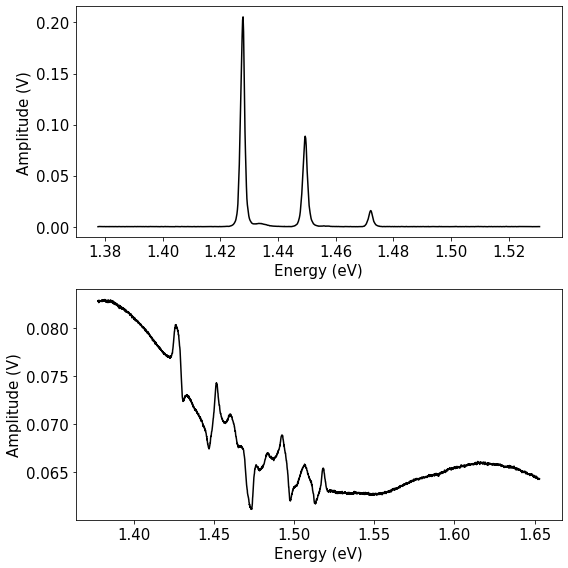

In [36]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(8,8))


ax0.plot(Energy(PL['Wavelength']), PL['Voltage'], color='k')
ax0.set_xlabel('Energy (eV)', size=15)
ax0.set_ylabel('Amplitude (V)', size=15)

ax0.tick_params(labelsize=15)


ax1.plot(Energy(R['Wavelength']), R['Voltage'], color='k')
ax1.set_xlabel('Energy (eV)', size=15)
ax1.set_ylabel('Amplitude (V)', size=15)

ax1.tick_params(labelsize=15)


fig.tight_layout()

plt.show()